# Probability Distributions

The fundamental object in statistics is the probability distribution. A probability distribution describes the liklihood of observing a particular outcome in some unknown process. In practice, you already know what a probability distribution is. What are the odds that you roll a 6 on a single die? How about a 2?

## Discrete Distributions

You know already that the probability of rolling any particular number is one in six. We can express this as a table:

| Outcome | Probability |
| ------- | ----------- |
| 1       | $\frac{1}{6}$|
| 2       | $\frac{1}{6}$|
| 3       | $\frac{1}{6}$|
| 4       | $\frac{1}{6}$|
| 5       | $\frac{1}{6}$|
| 6       | $\frac{1}{6}$|

This arrangement, where all outcomes are equally likely, is called a *uniform distribution*. In particular, this is a *discrete uniform distribution*. Outcomes are entirely separated, you cannot roll a 1.75 only a 1 or a 2. Many variables we might care about are discrete. Number of ICE arrests carried out in New York City in June is a discrete variable. Discrete variables don't need to be numbers. We could construct a probability distribution describing the odds of going in front of a particular judge when arrested in the jurisdiction of LA county.

While many things are discrete, most things are not uniform. Let's build on our dice example and simulate the rolling of a pair of dice. This time, instead of writing a table of the probabilities we know to be true, we will instead calculate the fraction of the time each possible roll of two dice occurred.


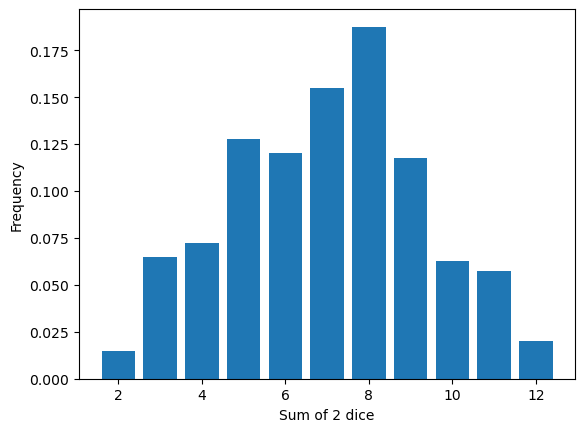

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import ArrayLike

def roll_sum(times: int, dice: int) -> ArrayLike:
    """Simulates the rolling of DICE six-sided die TIMES times"""
    
    sums = np.zeros(times)
    
    for time_i in range(times):
        
        results = np.zeros(dice)
        
        for die_j in range(dice):
            results[die_j] = np.random.choice(6) + 1
    
        sums[time_i] = results.sum()
    
    return sums

# perform the simulation
n_dice = 2
n_rolls = 400

rolls = roll_sum(n_rolls, n_dice)

# pull out the histogram
sums, counts = np.unique(rolls, return_counts=True)

# making the plots
fig, ax = plt.subplots()

ax.bar(sums, counts / np.sum(counts))

ax.set_xlabel(f"Sum of {n_dice} dice")
ax.set_ylabel(f"Frequency")

plt.show()

Its obvious that this is not uniform. Instead we see a peak in the middle of the range, we will see this shape again in the form of the Normal distribution but for now I want to highlight something else.

In this simulated case, we could come up with probabilities ahead of time for each of these results because we know the underlying mechanism (rolling two dice and adding them together). In general, however, this isn't true. We often don't know what the distribution ought to be.

This picture (and its associated numbers) is called an *empirical probability distribution*. It's empirical because its built out of our observations, its a probability distribution because it describes our best guess at what the underlying real distribution might be. We instead estimate the probability distribution based on the observed *frequencies* of the outcomes.


Often, our variables of interest won't be discrete. Often our variable will be something like height in which case you can absolutely observe intermediate, fractional values. In other cases our variable might truly be discrete but with a number of possible outcomes large enough that we don't want to think about them as discrete outcomes.

We can simulate that later situation as well, what happens if we're adding 300 dice together and rolling them 10,000 times?


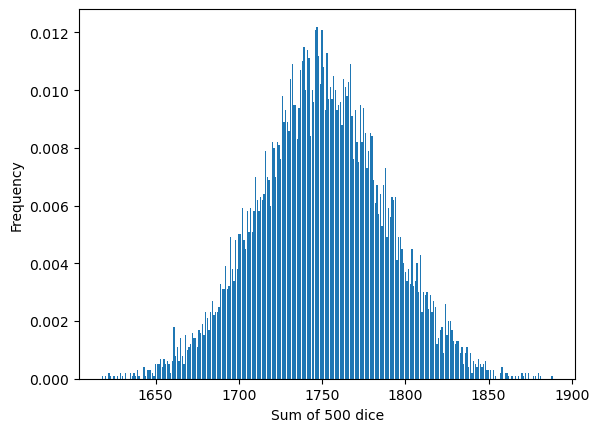

In [26]:
n_dice = 500
n_times = 10000
rolls = roll_sum(n_times, n_dice)

sums, counts = np.unique(rolls, return_counts=True)
freq = counts / np.sum(counts)

fig, ax = plt.subplots()

ax.bar(sums, freq)


ax.set_xlabel(f"Sum of {n_dice} dice")
ax.set_ylabel(f"Frequency")

plt.show()

Its starting not to look so discrete, right? It also looks kind of shitty and
each bar is so thin so as to stop being particularly useful as an individual
value. If we were to roll an infinate number of dice, we would theoretically
leave the discrete world entirely and end up with the one distribution to
which all distributions are compared. The infamous "bell curve," the normal
distribution.

## Continuous Distributions

### The Normal distribution

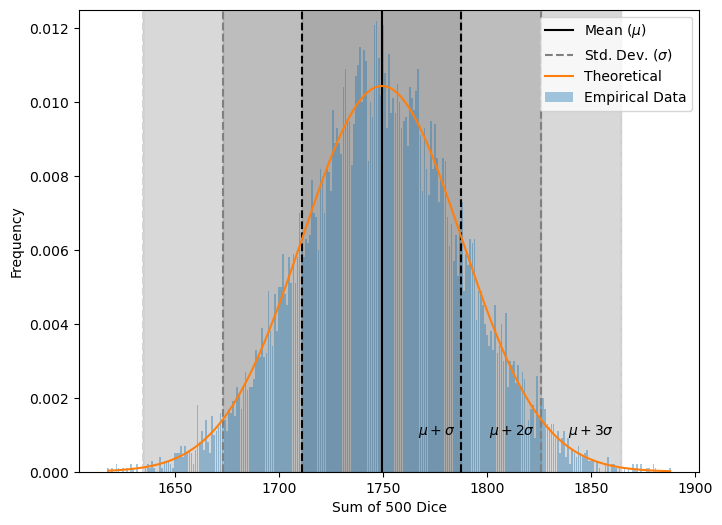

In [84]:
from scipy.stats import norm

# we're fitting a normal distribution to our data
e_mean = np.mean(rolls)
e_std = np.std(rolls)
norm_fit = norm(loc=e_mean, scale=e_std)

# this will be the x range for our nice looking distribution
x_range = np.linspace(rolls.min(), rolls.max(), 200)


# im building a very complicated figure here
fog, ax = plt.subplots(figsize=(8,6))

ax.fill_betweenx((0, 0.013), x1=e_mean - 3 * e_std, x2=e_mean + 3 * e_std,
                 color="grey", alpha=0.3)
ax.fill_betweenx((0, 0.013), x1=e_mean - 2 * e_std, x2=e_mean + 2 * e_std,
                 color="grey", alpha=0.3)
ax.fill_betweenx((0, 0.013), x1=e_mean - e_std, x2=e_mean + e_std,
                 color="grey", alpha=0.3)


ax.bar(sums, freq, alpha=0.4, label="Empirical Data")

ax.axvline(e_mean, c="k", label=r"Mean ($\mu$)")
ax.axvline(e_mean + e_std, c="k", ls="--")
ax.axvline(e_mean - e_std, c="k", ls="--")
ax.axvline(e_mean + 2 * e_std, c="grey", ls="--", label=r"Std. Dev. ($\sigma$)")
ax.axvline(e_mean - 2 * e_std, c="grey", ls="--")
ax.axvline(e_mean + 3 * e_std, c="lightgrey", ls="--")
ax.axvline(e_mean - 3 * e_std, c="lightgrey", ls="--")

ax.plot(x_range, norm_fit.pdf(x_range), c="C1", label="Theoretical")

ax.text(e_mean + e_std - 3, 0.001, s=r"$\mu + \sigma$", ha="right")
ax.text(e_mean + (2*e_std) - 3, 0.001, s=r"$\mu + 2\sigma$", ha="right")
ax.text(e_mean + (3*e_std) - 3, 0.001, s=r"$\mu + 3\sigma$", ha="right")

ax.legend()
ax.set_xlabel(f"Sum of {n_dice} Dice")
ax.set_ylabel(f"Frequency")

ax.set_ylim(0, 0.0125)

plt.show()

Before we get into the "Bell Curve" of it all, let's first just describe what it
says.

First of all, the normal distribution is unlike our dice in that it is
*continuous*. This means that variables drawn from a random variable are
infinitly precise. We might find measurements of 1712.1234552 or whatever. In
principle we can no longer enumerate all possible values. Strictly speaking,
anything is possible in a continuous distribution.

The normal distribution itself describes a random variable where most values are
around the mean, in fact the most likely or *modal* outcome is theoretically
identical to the mean. In addition, outcomes are less and less likely to occur
as we move away from that mean.

In fact, we can describe exactly how much we expect to see in the vertical
shaded regions. We expect 68.2% of all of our observations to fall within one
standard deviation ($\sigma$) of the mean ($\mu$) in the darkest shaded region
in the center. Moving outward in both directions, we expect 95.4% of
observations to fall within two standard deviations of the mean. The mean and
standard deviation are very interpretable in the normal distribution. The mean
should be very close to the mode and the standard deviation should neatly
describe the symetrical falling off of probability as we look away from the
mean.

In its shaped and the interpretability of means and standard deviatyions it is
very similar to our pair of dice distribution. Its no coincidence, the 
*central limit theorum* tells us that the distribution of sums of random
variables (such as dice) approaches a normal distribution as the number of
summed things increases regardless of how the random variables themselves are 
distributed (such a how dice are uniformly distributed). Do not repeat this
definition to a statistician, its a bit more technical but this is good enough. 

The central limit theorum is why the normal distribuition is treated as the main
one, statisticians assume that most things work this way in some abstract sense.
We will certainly encounter the normal distribution but this assumption is bad
and wrong. As we'll see shortly, social systems tend to produce some entirely
different thing.

### The "Bell Curve" of it all

A truly staggering amount of statistics comes from eugenics. If you hear of a
Western statistician (or biologist, or sociologist, or...) before, say, 1950,
they are probably a eugenicist. As we proceed in this course, I will note when
methods that we're using came from eugenicists. It will be a lot of them.

The normal distribution itself predates eugenics as such dating back to the
1700s. They're doing colonialism but they don't know about genes yet. They don't
understand coin flips so they invent the normal distribution. The central limit
theorum was described in the early 1800s. It really get's fleshed out in the
early 1900s by a team of European and Soviet physicists. For whatever reason,
the physicists tend not to be caught up in eugenics but of course [they have their
own problems](https://en.wikipedia.org/wiki/Atomic_bombings_of_Hiroshima_and_Nagasaki).

Where the normal distribution itself gets really caught up in eugenics is with the
concept of IQ. A guy named Spearman came up with a really good way to do
correlation which we'll see later. Later had the idea that maybe underlying all
intelligence there was some factor $g$ that was itself a sum of various other
factors. Thus, "IQ is real and normally distributed." This gives us
*The Bell Curve* amoong a whole slew of bad stuff.

Of course, IQ test scores are not actually normally distributed and [must be
rescaled](https://en.wikipedia.org/wiki/Intelligence_quotient#cite_note-87)
to achieve the shape of the normal distribution.

### Normal distribution in real data

As I mentioned, we will encounter the normal distribution in real life. We're
going to use heights (of men), the classsic example of something that is normally
distributed. [I found the data here](https://github.com/Jagadeesh131296/Heights-and-Weights-Dataset).
Let's look at a histogram, again with a theoretical curve overlay.


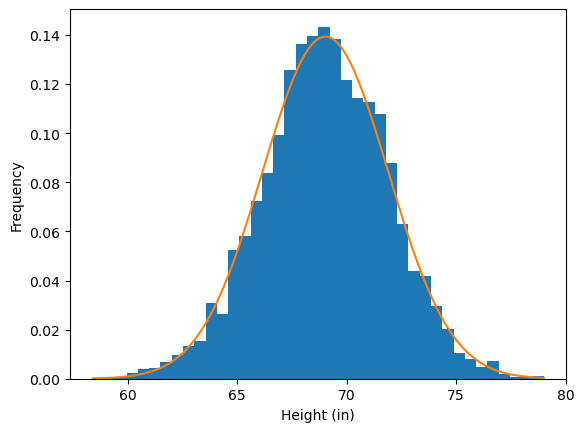

In [ ]:
import pandas as pd

# load the data, filter
df = pd.read_csv("data/weight-height.csv")
df_men = df[df["Gender"] == "Male"]

mean_height = df_men["Height"].mean()
sd_height = df_men["Height"].std()

height_norm = norm(loc=mean_height, scale=sd_height)
x_height = np.linspace(np.min(df_men["Height"]), np.max(df_men["Height"]), 200)

counts, bins = np.histogram(df_men["Height"])
freq = counts / counts.sum()

fig, ax = plt.subplots()

ax.hist(df_men["Height"], bins=40, density=True)
ax.plot(x_height, height_norm.pdf(x_height), c="C1")

ax.set_xlabel("Height (in)")
ax.set_ylabel("Frequency")

plt.show()

Hell yeah.

Let's try something else. How about number of days in ICE detention.

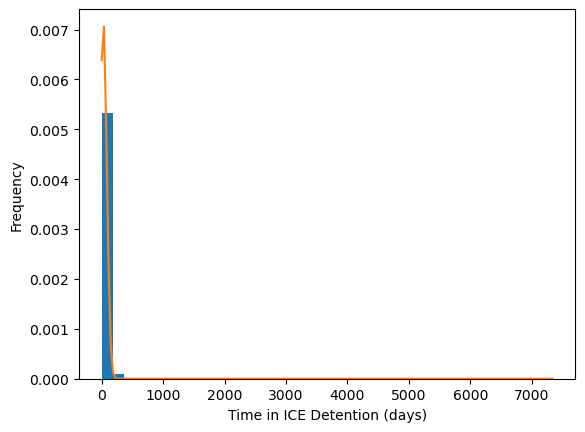

In [92]:

# load the data, filter
df = pd.read_csv("data/ice_release_jul2025/ice_detentions.csv", header = 6)

# some initial cleaning
df["Book In Date Time"] = pd.to_datetime(df["Book In Date Time"])
df["Detention Book Out Date Time"] = pd.to_datetime(df["Detention Book Out Date Time"])

df["days_in_detention"] = (df["Detention Book Out Date Time"] - df["Book In Date Time"]).dt.days

# just making a shorter name
dd = df["days_in_detention"].dropna()

mean_dd = dd.mean()
sd_dd = dd.std()

dd_norm = norm(loc=mean_dd, scale=sd_dd)
x_height = np.linspace(np.min(dd), np.max(dd), 200)

counts, bins = np.histogram(dd)
freq = counts / counts.sum()

fig, ax = plt.subplots()

ax.hist(dd, bins=40, density=True)
ax.plot(x_height, dd_norm.pdf(x_height), c="C1")

ax.set_xlabel("Time in ICE Detention (days)")
ax.set_ylabel("Frequency")

plt.show()

Fuck me.

## Heavy-tailed distributions